## Download Dataset

In [5]:
# download dataset (etd 10mins)
!wget -nc "https://zenodo.org/records/17351690/files/imagine_decoding_challenge.zip?download=1" -O imagine_decoding_challenge.zip
!unzip -q imagine_decoding_challenge.zip

File ‘imagine_decoding_challenge.zip’ already there; not retrieving.


## Imports


In [49]:
import mne
import torch, torchvision
import matplotlib
import numpy as np
import tqdm
from pathlib import Path


np.random.seed(0)  # for reproducibility
data_dir = Path('./imagine_decoding_challenge//')  # set to path where your data is
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'


In [31]:
epochs = mne.read_epochs(test_dir / 'sub-01/sub-01_localizer-epo.fif', preload=True)
data_x = epochs.get_data()  # shape (n_trials, n_channels, n_timepoints)
data_y = epochs.events[:, 2]  # shape (n_trials)
labels = epochs.event_id  # contains the labels for the indices


Reading /Users/stephano/GitHub/IMAGINE-decoding-challenge/imagine_decoding_challenge/test/sub-01/sub-01_localizer-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated


In [58]:
localizer_train, localizer_test = {}, {}
imagine_train, imagine_test = {}, {}

# load train epochs for all participants for both imagine and localizer
participants = list(train_dir.rglob("sub-*/"))
for participant in tqdm.tqdm(participants, desc="Loading Train Epochs"):
    participant_id = participant.name
    
    localizer_trial = participant / f"{participant_id}_localizer-epo.fif"
    epochs_localizer = mne.read_epochs(localizer_trial, preload=True, verbose='WARNING')
    localizer_train[participant_id] = epochs_localizer

    imagine_trial = participant / f"{participant_id}_imagine-epo.fif"
    epochs_imagine = mne.read_epochs(imagine_trial, preload=True, verbose='WARNING')
    imagine_train[participant_id] = epochs_imagine

# load test epochs for all participants for both imagine and localizer
participants = list(test_dir.rglob("sub-*/"))
for participant in tqdm.tqdm(participants, desc="Loading Test Epochs"):
    participant_id = participant.name
    
    localizer_trial = participant / f"{participant_id}_localizer-epo.fif"
    epochs_localizer = mne.read_epochs(localizer_trial, preload=True, verbose='WARNING')
    localizer_test[participant_id] = epochs_localizer

    imagine_trial = participant / f"{participant_id}_imagine-epo.fif"
    epochs_imagine = mne.read_epochs(imagine_trial, preload=True, verbose='WARNING')
    imagine_test[participant_id] = epochs_imagine


Loading Train Epochs: 100%|█| 15/15 [00:01<00:00,
Loading Test Epochs: 100%|█| 14/14 [00:01<00:00, 


In [64]:
localizer_test["sub-01"]

<EpochsFIF | 480 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~143.2 MiB, data loaded,
 'apple': 48
 'bicycle': 48
 'brush': 48
 'cake': 48
 'clown': 48
 'cup': 48
 'desk': 48
 'foot': 48
 'mountain': 48
 'zebra': 48>

Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
combining channels using RMS (mag channels)
combining channels using RMS (grad channels)


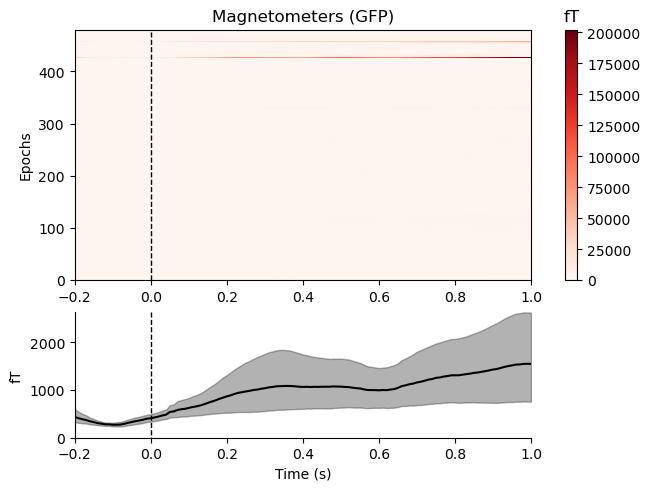

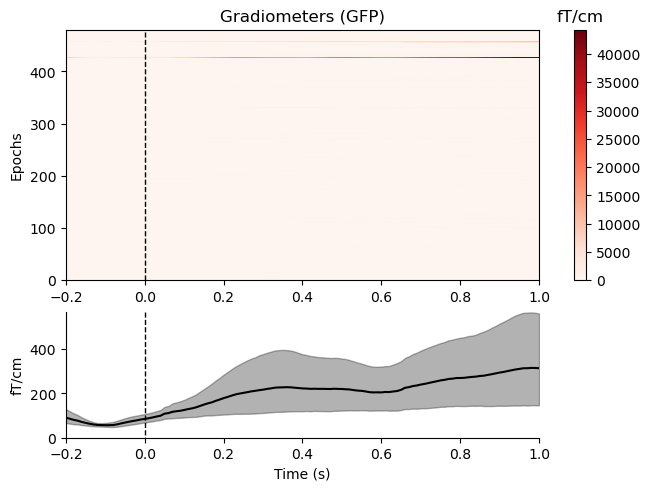

[<Figure size 640x480 with 3 Axes>, <Figure size 640x480 with 3 Axes>]

In [66]:
localizer_test["sub-01"].plot_image()

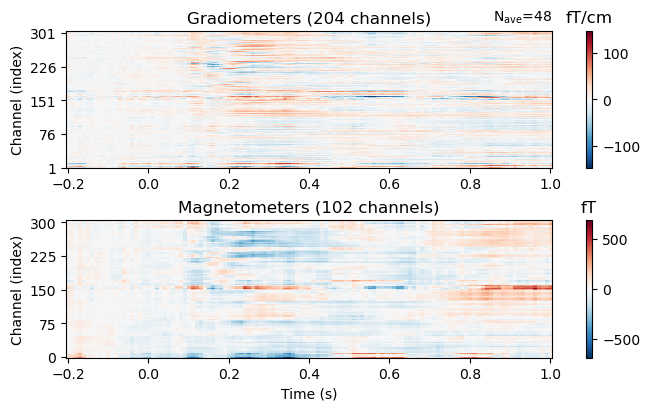

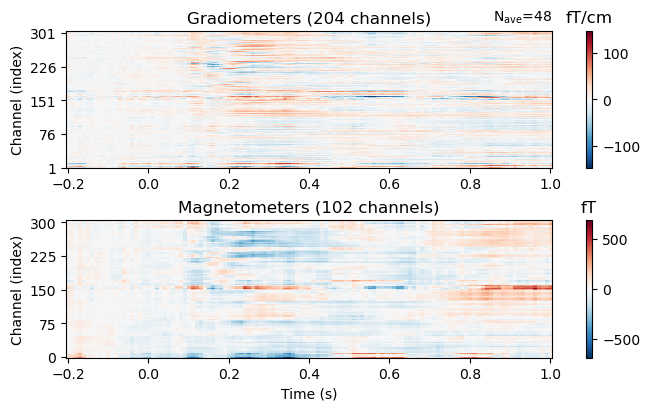

In [76]:
localizer_test["sub-01"]['zebra'].average().plot_image()

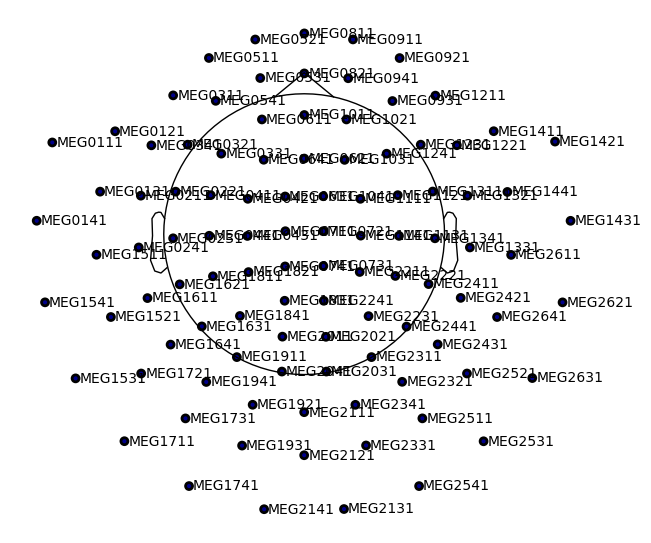

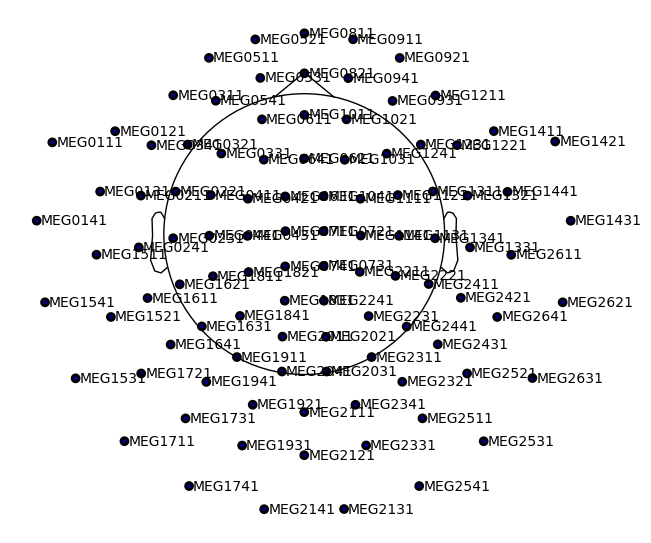

In [79]:
localizer_test["sub-01"].plot_sensors(show_names=True)

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Averaging across epochs before plotting...


/nix/store/8cd42ajys51qqbwah8cbvm4a0qla1qp0-python3-3.13.9-env/lib/python3.13/site-packages/mne/viz/utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


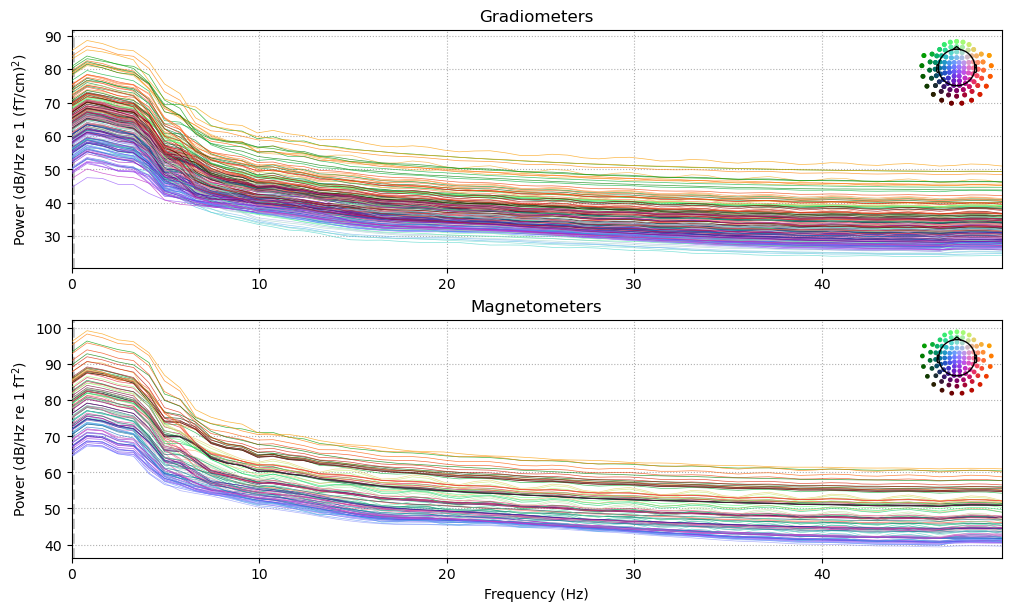

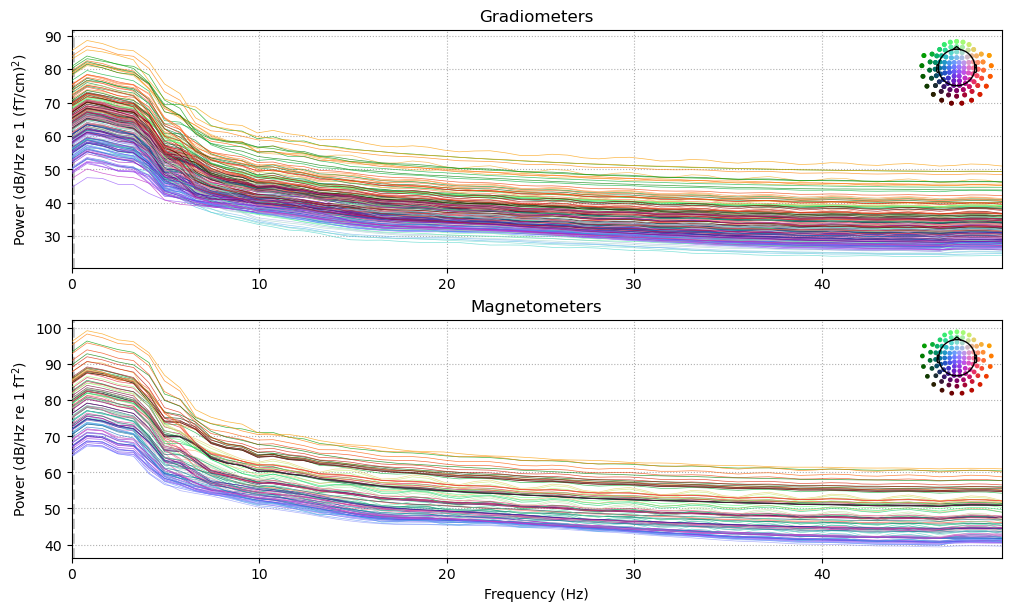

In [82]:
localizer_test["sub-01"].compute_psd().plot()